<a href="https://colab.research.google.com/github/Bhavya05shah/Image_Preprocesing/blob/main/Image_preprocessing_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

image_file = "page_01.jpg"
img = cv2.imread(image_file)

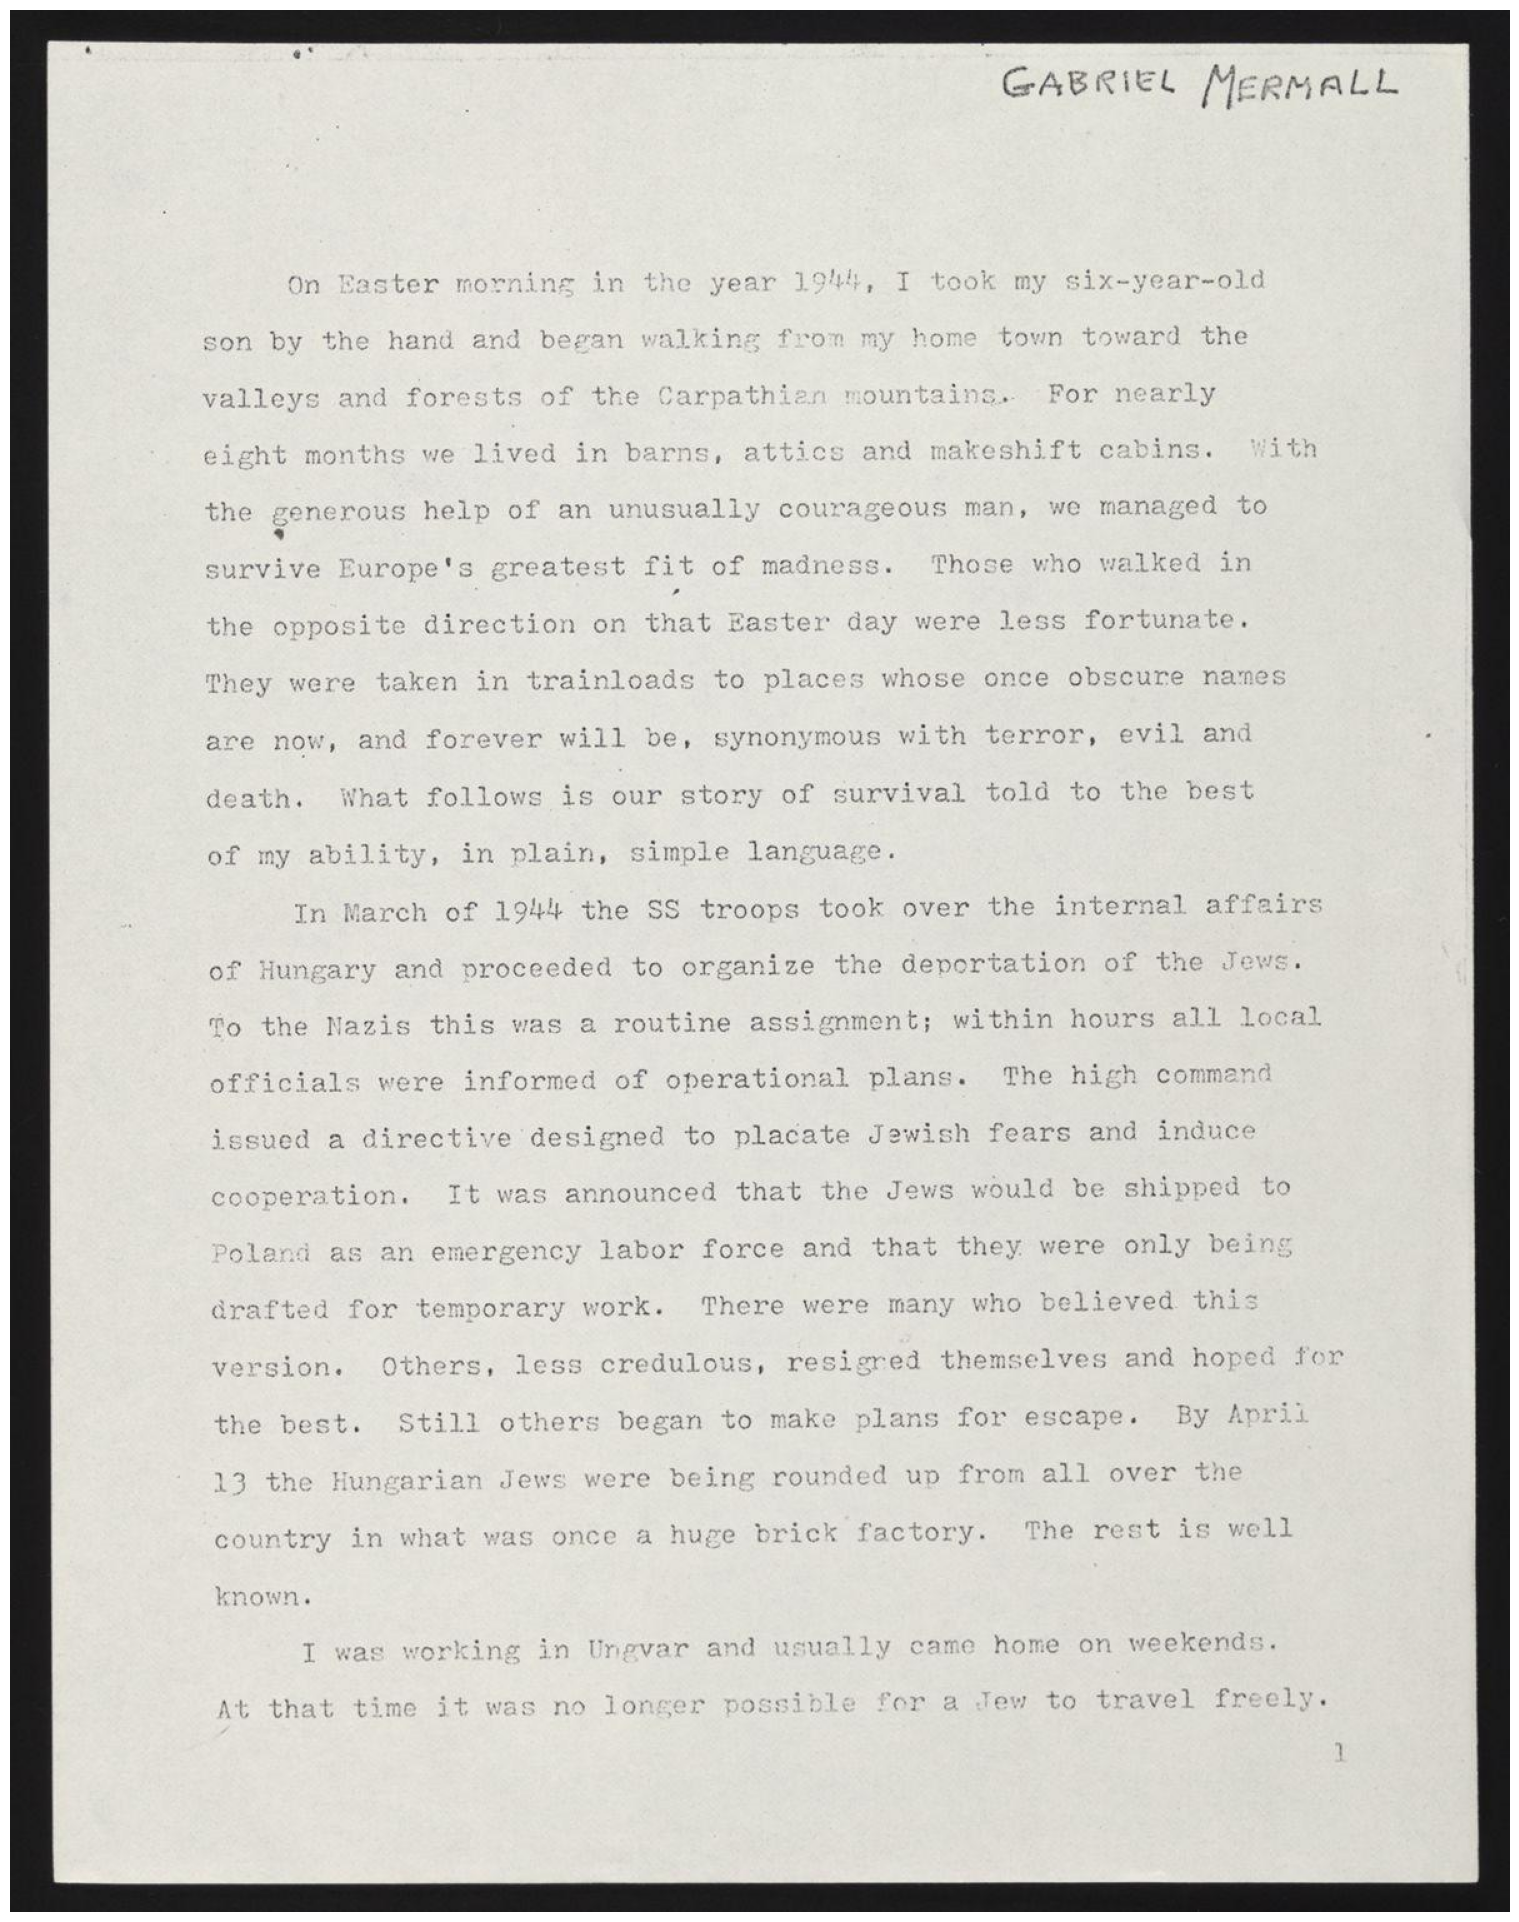

In [9]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

display(image_file)

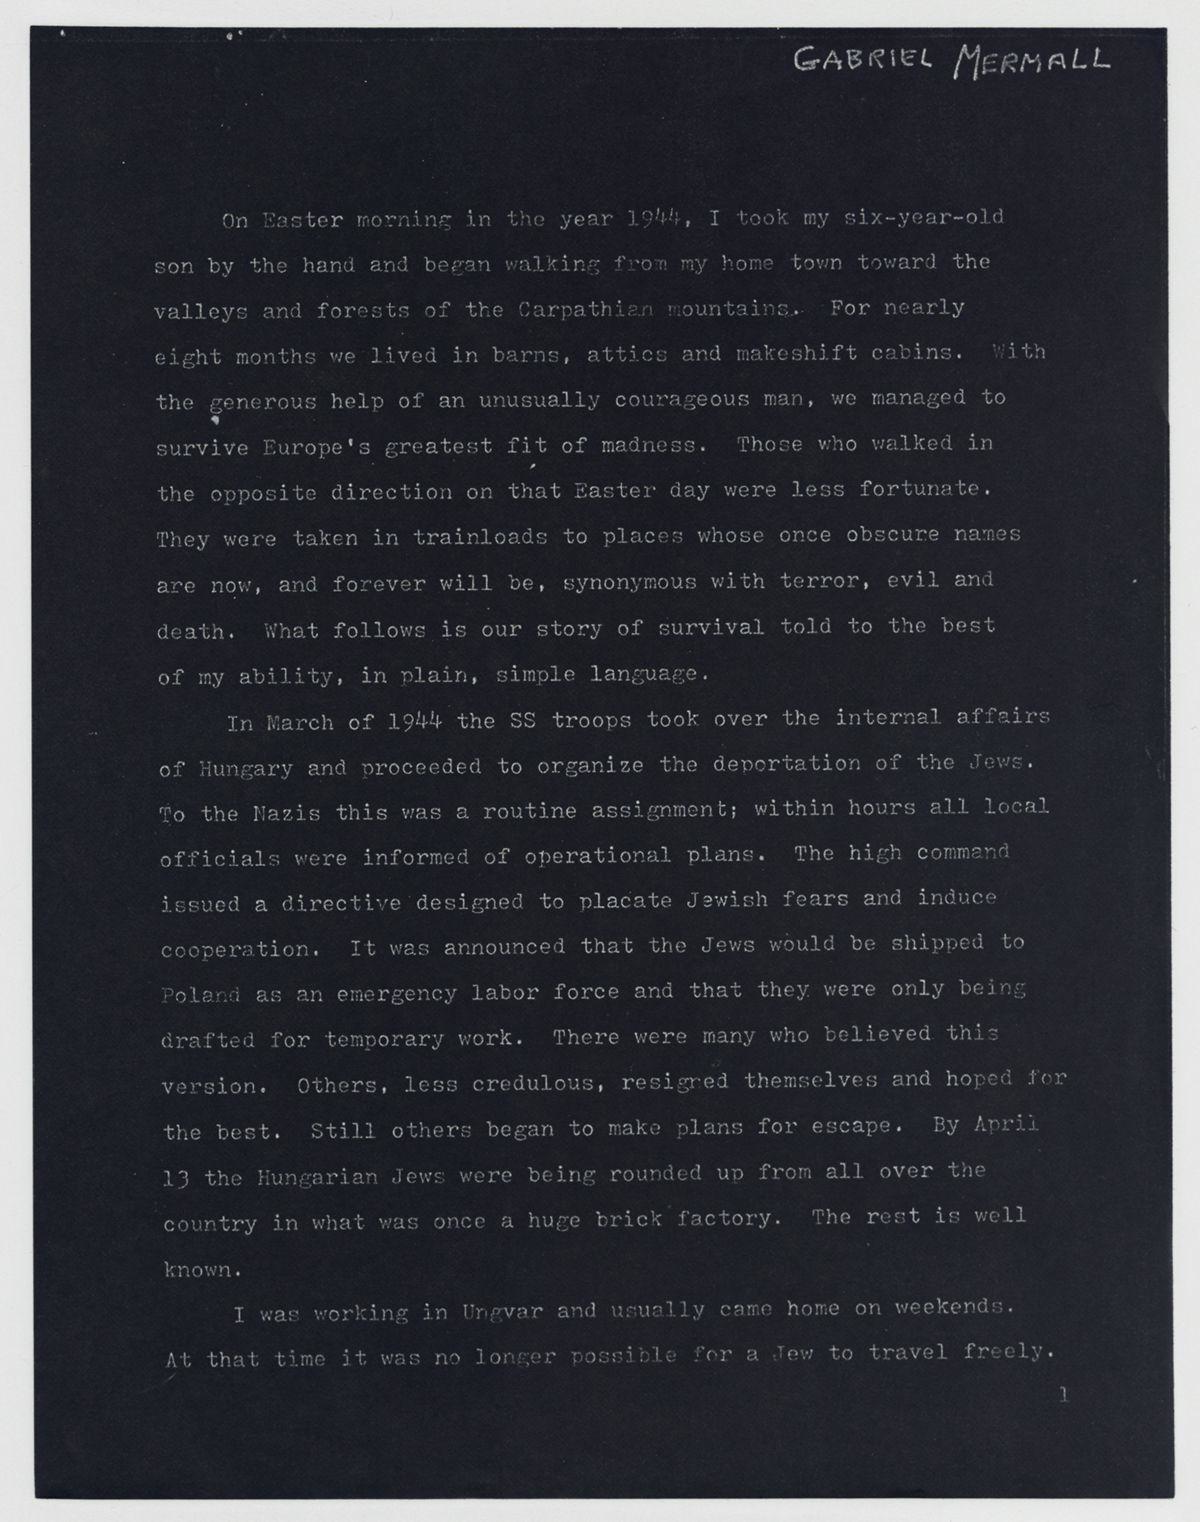

In [11]:
inverted_image = cv2.bitwise_not(img)
cv2_imshow(inverted_image)

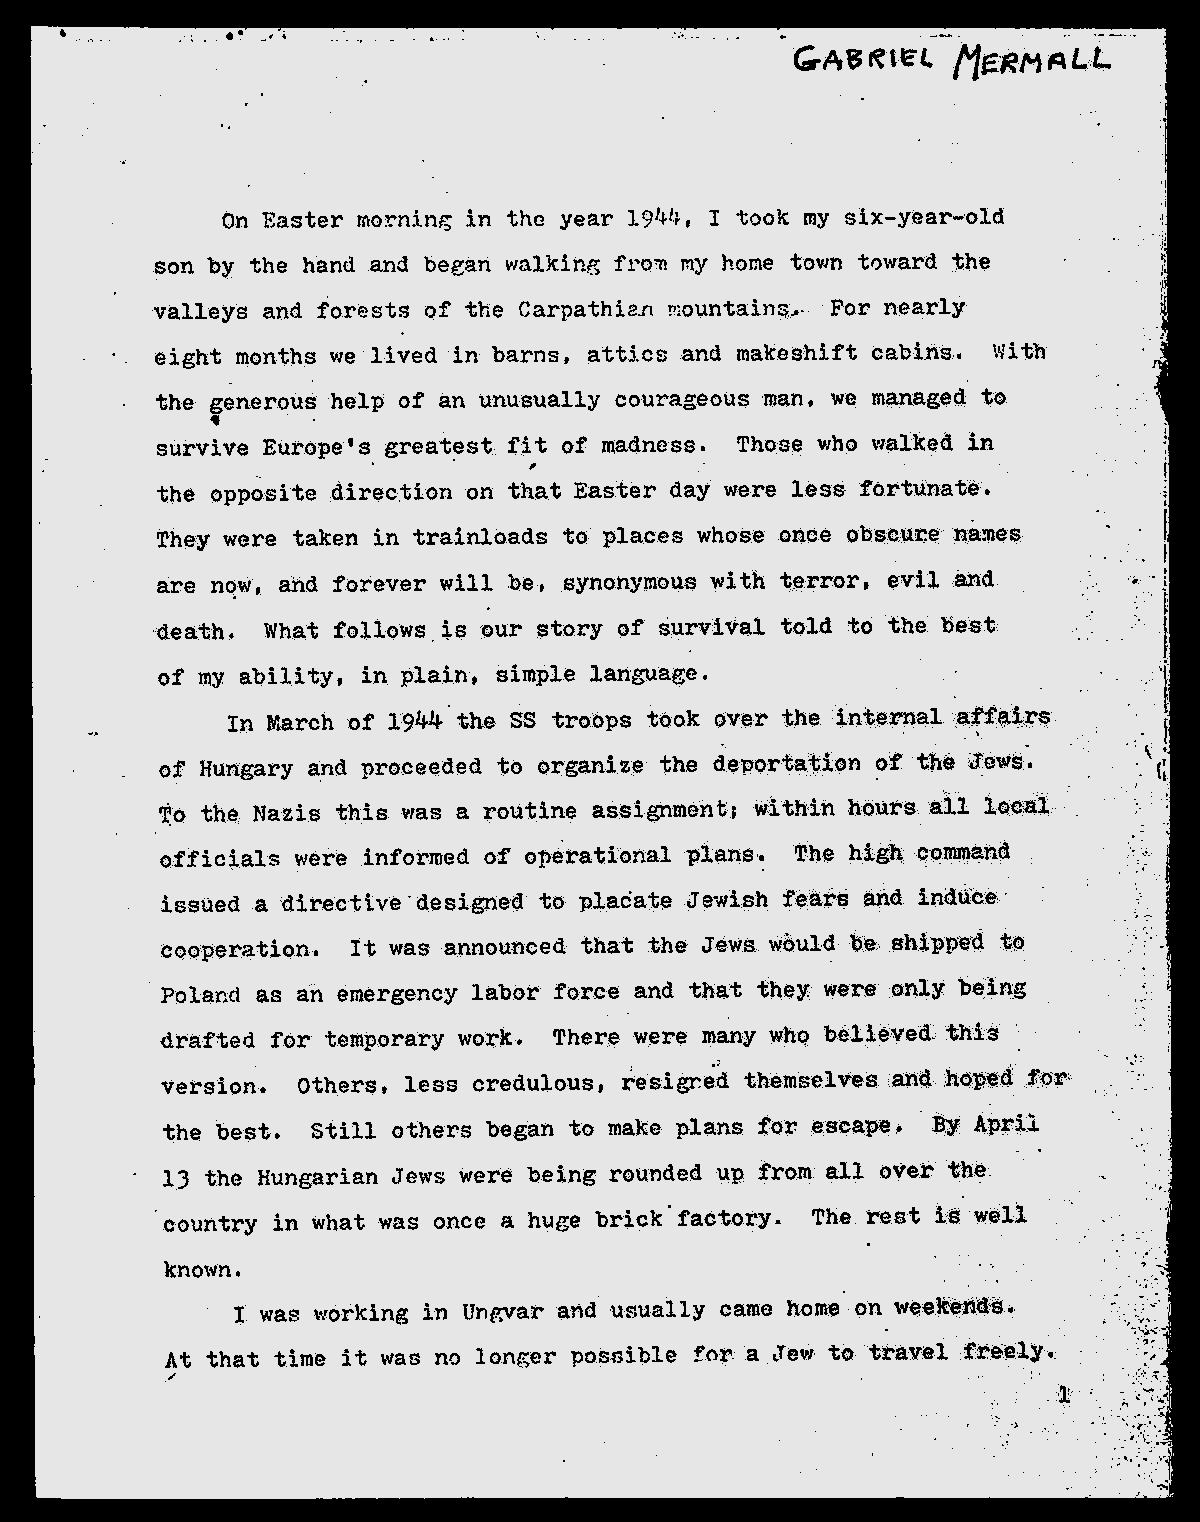

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh, im_bw = cv2.threshold(gray, 210, 230, cv2.THRESH_BINARY)
cv2_imshow(im_bw)

In [13]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [14]:
no_noise = noise_removal(im_bw)

In [15]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

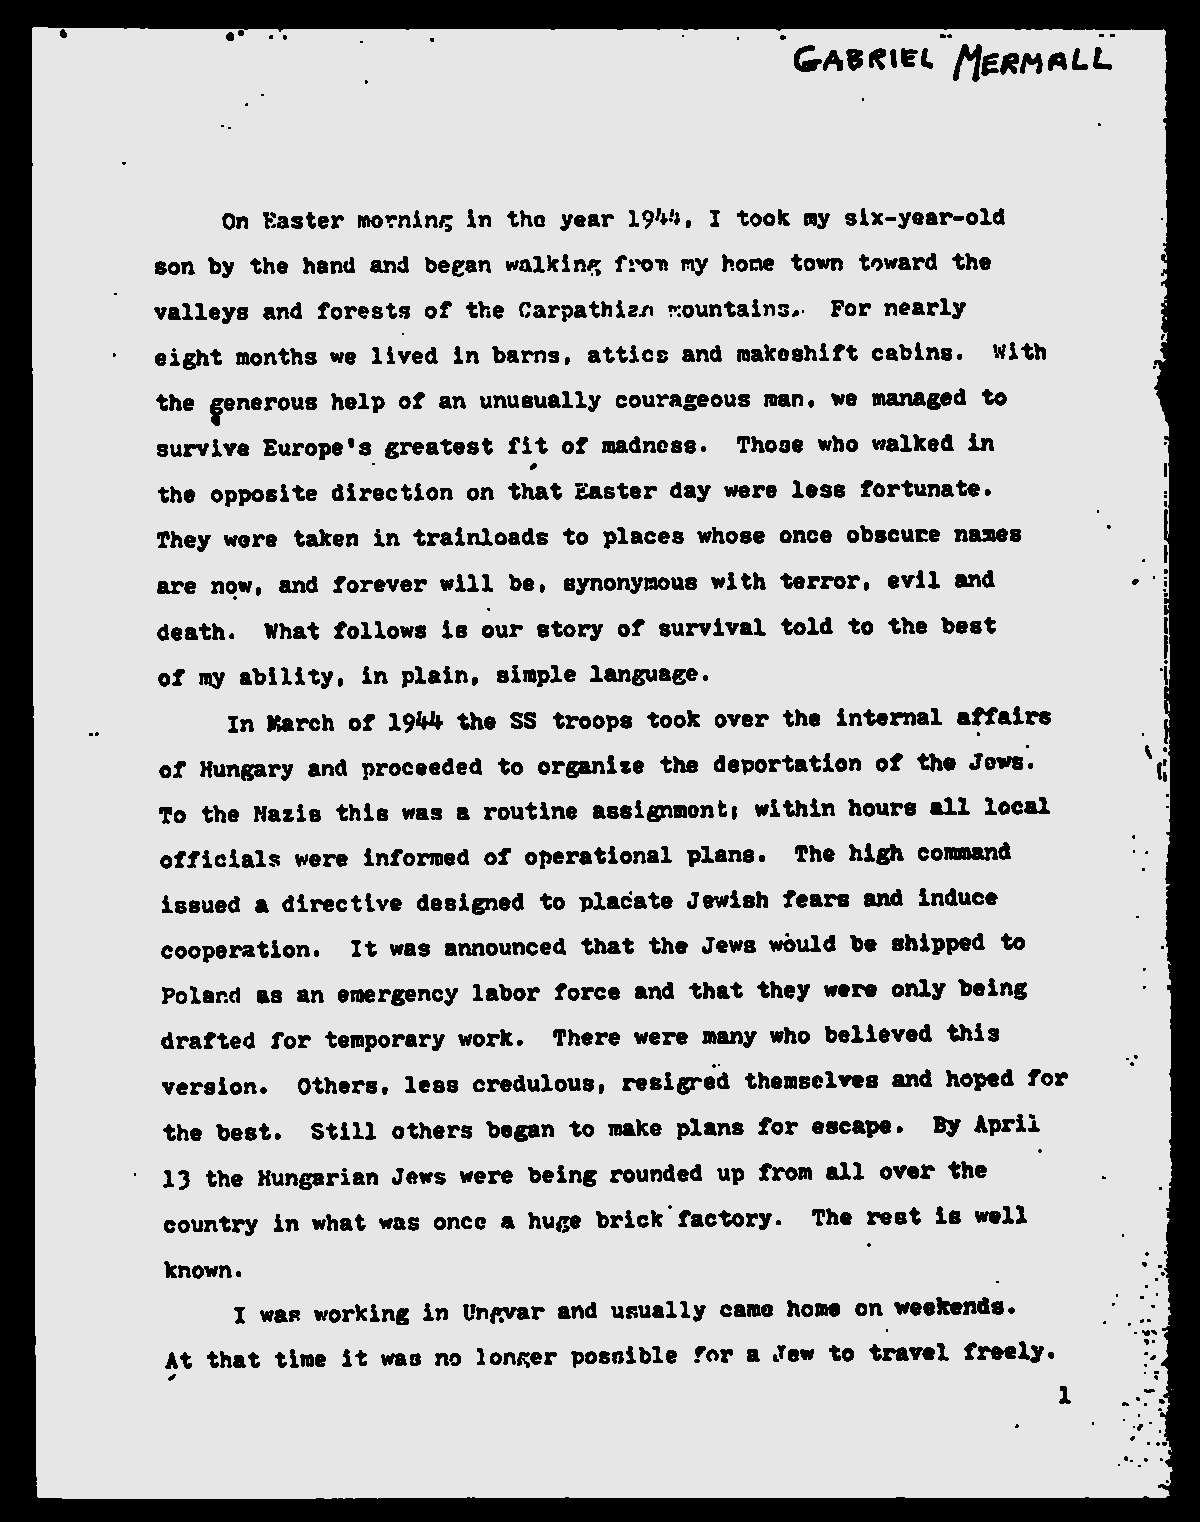

In [16]:
dilated_image = thick_font(no_noise)
cv2_imshow(dilated_image)